In [1]:
from matplotlib import pyplot as plt
import numpy as np

from bitstrings import BitstringGA

In [7]:
# Genetic Algorithm parameters
POPULATION_SIZE = 100
MUTATION_RATE = 0.01
CROSSOVER_RATE = 0.7
GENERATIONS = 1000

# bitstring parameters
LENGTH = 16

# plotting parameters
PLOT = 5

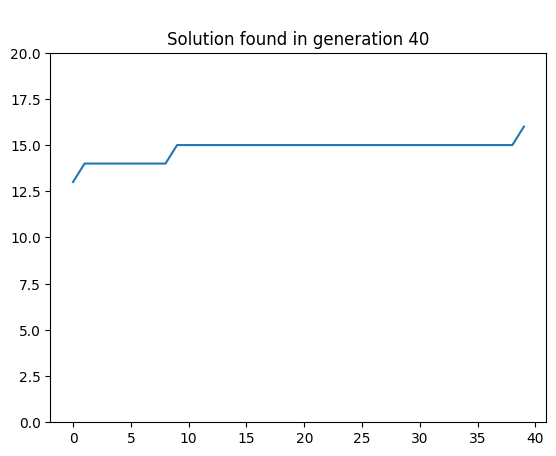



-----------------------------------------------------------------------------------


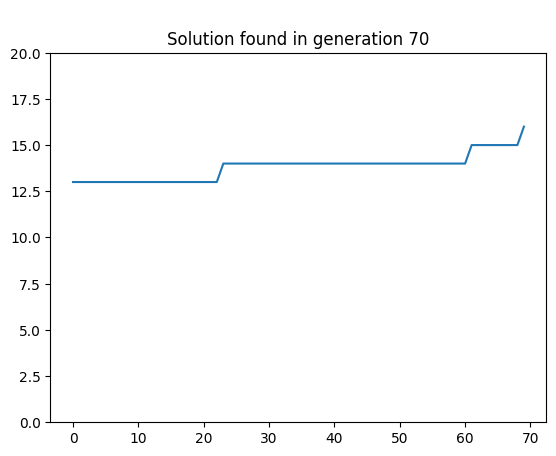



-----------------------------------------------------------------------------------


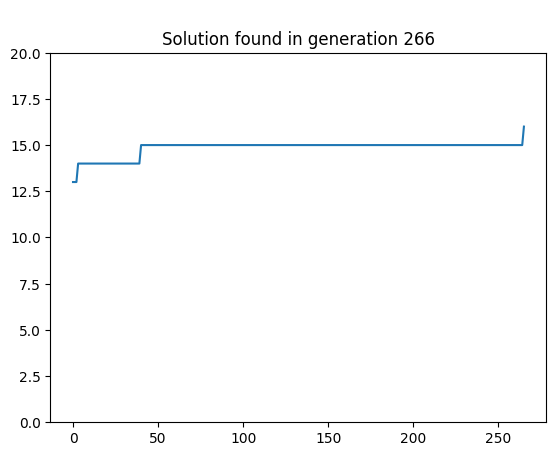



-----------------------------------------------------------------------------------


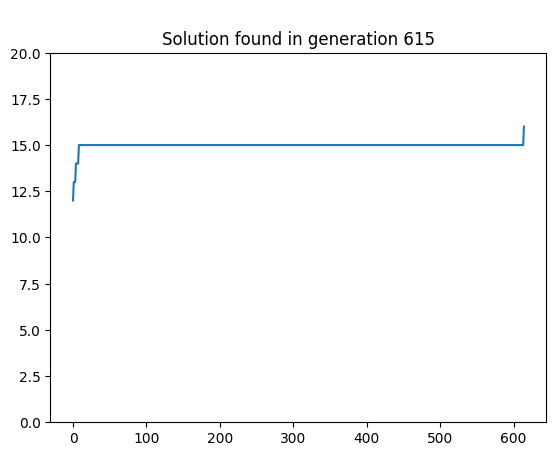



-----------------------------------------------------------------------------------


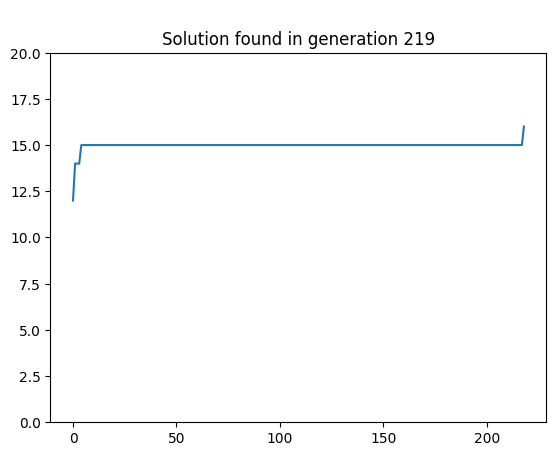

16.0

In [8]:
ga_runner = BitstringGA()
max_scores = []
for i in range(PLOT):
    scores = ga_runner.select(GENERATIONS, POPULATION_SIZE, MUTATION_RATE, CROSSOVER_RATE, success_score=LENGTH, length=LENGTH)
    plt.plot(scores)
    plt.ylim(0,LENGTH+4)
    max_score = max(scores)
    max_scores.append(max_score)
    if max_score == LENGTH:
        plt.title(f"\nSolution found in generation {len(scores)}")
    else:
        plt.title(f"\nSolution not found. Max score: {max_score}")
    plt.show()
    if i != PLOT - 1:
        print("\n\n-----------------------------------------------------------------------------------")